In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

In this study of heart disease prediction, we focus on exercise-induced angina which is chest discomfort or pain that occurs when the heart muscle doesn't get enough oxygen-rich blood during physical exertion. It's a symptom of coronary artery disease.By analyzing features such as age, gender, chest pain type, and more, we aim to build a predictive model using machine learning techniques.

## Importing required libraries


In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split

## **Data preprocessing**

In [26]:
df=pd.read_csv("/content/drive/MyDrive/AI For Smart Sensors and actuators/Advance Programming/case Study/Data.csv")

In [27]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   int64  
 1   Sex             2943 non-null   int64  
 2   ChestPainType   2943 non-null   int64  
 3   RestingBP       2943 non-null   int64  
 4   Cholesterol     2943 non-null   int64  
 5   FastingBS       2943 non-null   int64  
 6   RestingECG      2943 non-null   int64  
 7   MaxHR           2943 non-null   int64  
 8   ExerciseAngina  2943 non-null   int64  
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 253.0 KB


In [29]:
# check if any dupilcate rows exist.
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df)

      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
1933   34    0              1        118          210          0           1   
1949   50    0              1        120          244          0           1   
1961   46    1              0        120          249          0           0   
1973   55    1              0        140          217          0           1   
1979   66    0              2        146          278          0           0   
...   ...  ...            ...        ...          ...        ...         ...   
2938   59    1              1        140          221          0           1   
2939   60    1              0        125          258          0           0   
2940   47    1              0        110          275          0           0   
2941   50    0              0        110          254          0           0   
2942   54    1              0        120          188          0           1   

      MaxHR  ExerciseAngina  Oldpeak  H

In [30]:
# remove duplicates
df = df.drop_duplicates()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 0 to 2796
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2220 non-null   int64  
 1   Sex             2220 non-null   int64  
 2   ChestPainType   2220 non-null   int64  
 3   RestingBP       2220 non-null   int64  
 4   Cholesterol     2220 non-null   int64  
 5   FastingBS       2220 non-null   int64  
 6   RestingECG      2220 non-null   int64  
 7   MaxHR           2220 non-null   int64  
 8   ExerciseAngina  2220 non-null   int64  
 9   Oldpeak         2220 non-null   float64
 10  HeartDisease    2220 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 208.1 KB


(array([ 968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1252.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

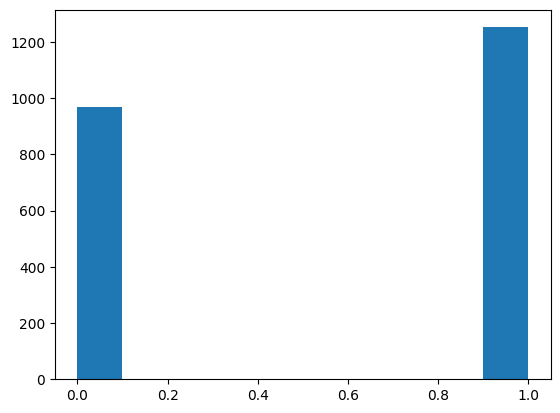

In [32]:
plt.hist(df["HeartDisease"])

In [33]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


ChestPainType: This categorizes the type of chest pain experienced by the individual. The values are:


1.   Typical angina, which is chest pain related to the heart.
2.   Atypical angina, which is chest pain not related to the heart.
3.   Non-anginal pain, which is typically sharp and non-continuous.
4.   Asymptomatic, meaning the individual experiences no symptoms.

In [34]:
df = pd.get_dummies(df, columns=['ChestPainType'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3
0,40,1,140,289,0,0,172,0,0.0,0,False,True,False,False
1,49,0,160,180,0,0,156,0,1.0,1,False,False,True,False
2,37,1,130,283,0,1,98,0,0.0,0,False,True,False,False
3,48,0,138,214,0,0,108,1,1.5,1,False,False,False,True
4,54,1,150,195,0,0,122,0,0.0,0,False,False,True,False


In [35]:
X = df.drop('HeartDisease', axis=1).values
y = df['HeartDisease'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model Training and Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


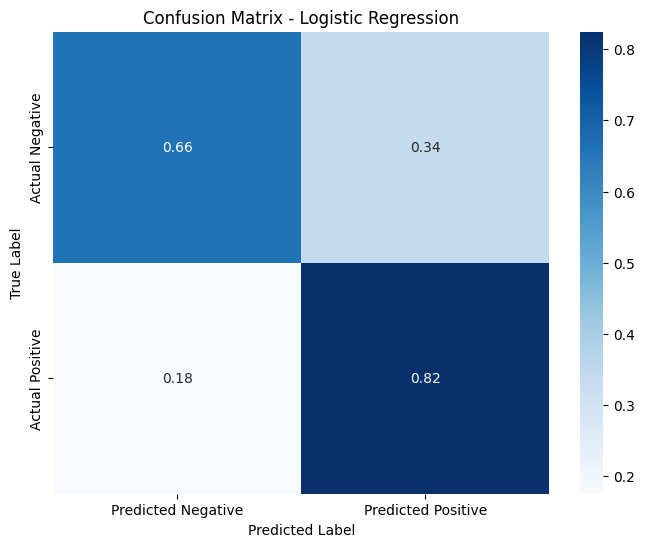

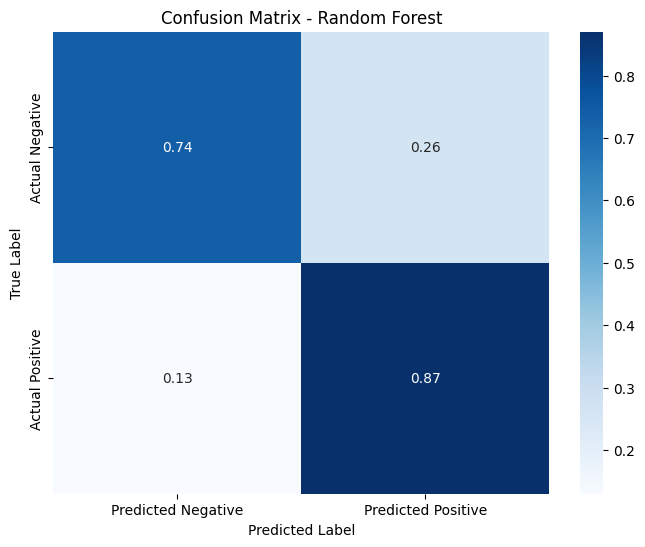

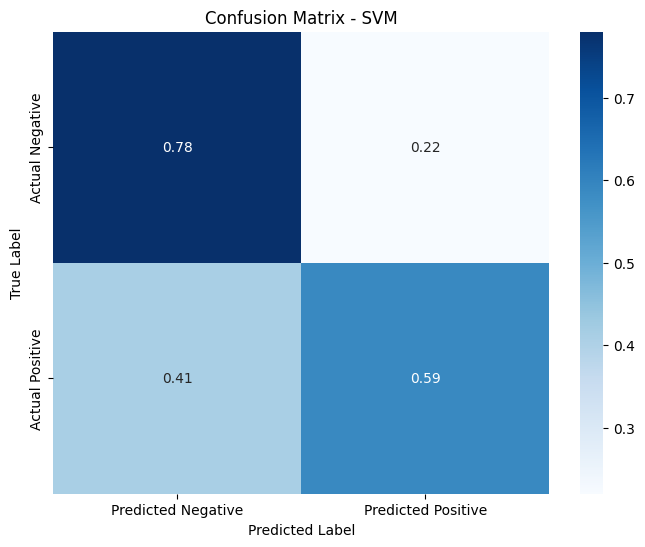

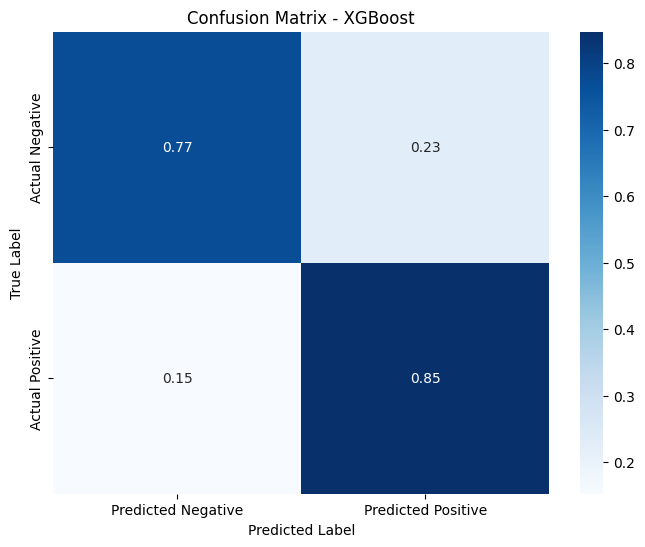

[LightGBM] [Info] Number of positive: 1121, number of negative: 877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 1998, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.561061 -> initscore=0.245469
[LightGBM] [Info] Start training from score 0.245469


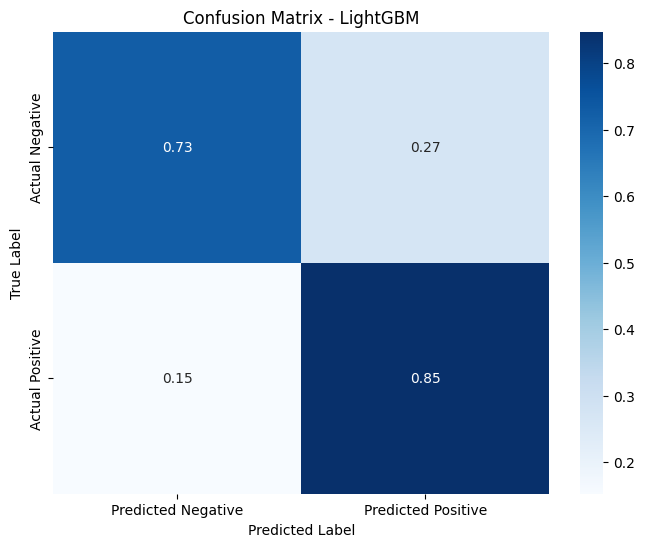

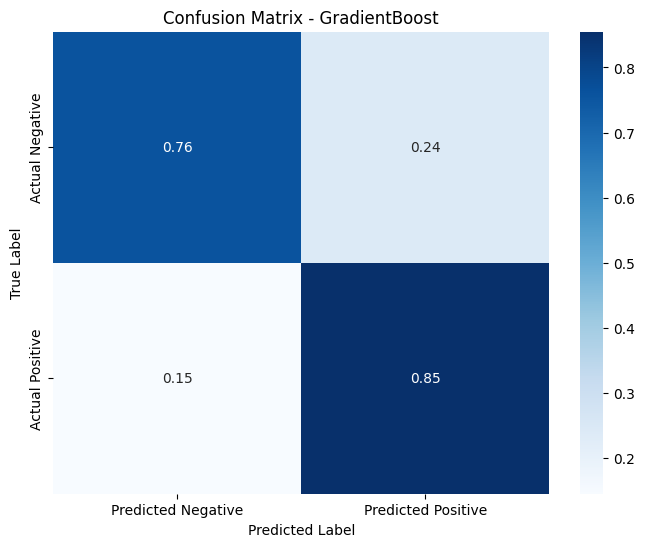

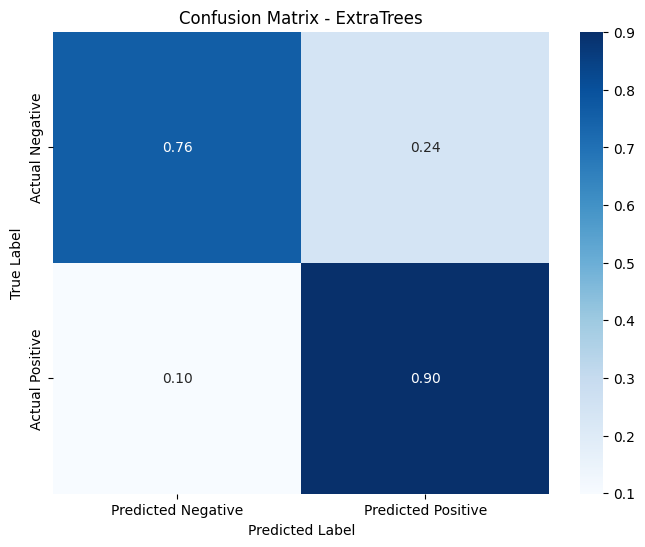

In [37]:
train_result = []
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'ExtraTrees':ExtraTreesClassifier()
}

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and test each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions)
    train_result.append(f'{name} - test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}')
     # Append performance metrics to respective lists
    accuracy_scores.append(test_accuracy)
    precision_scores.append(test_precision)
    recall_scores.append(test_recall)
    f1_scores.append(test_f1)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, test_predictions)
    # Normalize confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt=".2f", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluation metrices
 1. Recall - the number of true positives divided by the total number of true positives
 2. f1 score -   It combines precision and recall into a single value. actually its a harmonic mean of precision and recall
 3. accuracy = accuracy is the fraction of predictions our model got right.
 4. precession = model correctly predicts the positive class.

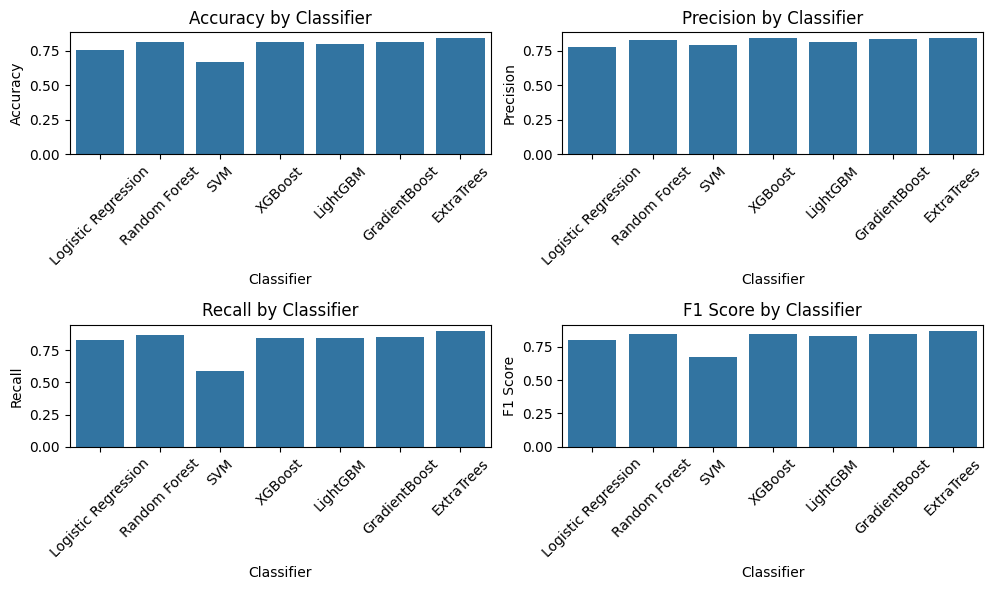

In [38]:
# Visualize performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=list(classifiers.keys()), y=scores[i])
    plt.title(f'{metric} by Classifier')
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [39]:
for item in train_result:
  print(item)

Logistic Regression - test Accuracy: 0.7567567567567568, Precision: 0.7769784172661871, Recall: 0.8244274809160306, F1 Score: 0.8
Random Forest - test Accuracy: 0.8153153153153153, Precision: 0.8260869565217391, Recall: 0.8702290076335878, F1 Score: 0.8475836431226766
SVM - test Accuracy: 0.6666666666666666, Precision: 0.7938144329896907, Recall: 0.5877862595419847, F1 Score: 0.6754385964912281
XGBoost - test Accuracy: 0.8153153153153153, Precision: 0.8409090909090909, Recall: 0.8473282442748091, F1 Score: 0.8441064638783269
LightGBM - test Accuracy: 0.7972972972972973, Precision: 0.8161764705882353, Recall: 0.8473282442748091, F1 Score: 0.8314606741573033
GradientBoost - test Accuracy: 0.8153153153153153, Precision: 0.835820895522388, Recall: 0.8549618320610687, F1 Score: 0.8452830188679246
ExtraTrees - test Accuracy: 0.8423423423423423, Precision: 0.8428571428571429, Recall: 0.9007633587786259, F1 Score: 0.8708487084870847
